In [1]:
import importlib
import os
from tabulate import tabulate

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDecisionTreeClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

# Technical Report

### Introduction

We used two datasets from kaggle.com, the first set being NBA players' names, their teams, and their salaries from the 2017 - 2018 season. 
The second dataset contained NBA players' names, start year, end year, position, height, weight, birthdate, and college.

Attempting to classify the player salaries, we attempted Random Forest, decision tree, and ZeroR classification methods.

### Data Analysis

The salary dataset of 573 instances was joined with the player stats dataset of 4500 instances, and we eliminated all attributes except salary, start year, height, weight class, and position.
By far, the most impactful attribute was start year. There was a strong correlation between start year and salary: the later the start year, the higher the player salary.
We also decided to discretize the salary and weight, due to the large spread and strange clumps in our data.

Salary was spread into 5 buckets with 
salary class 1 being <= \$100,000 per year, class 2 being < \$1,000,000, class 3 being < \$5,000,000, class 4 being < \$10,000,000, and class 5 being > \$10,000,000



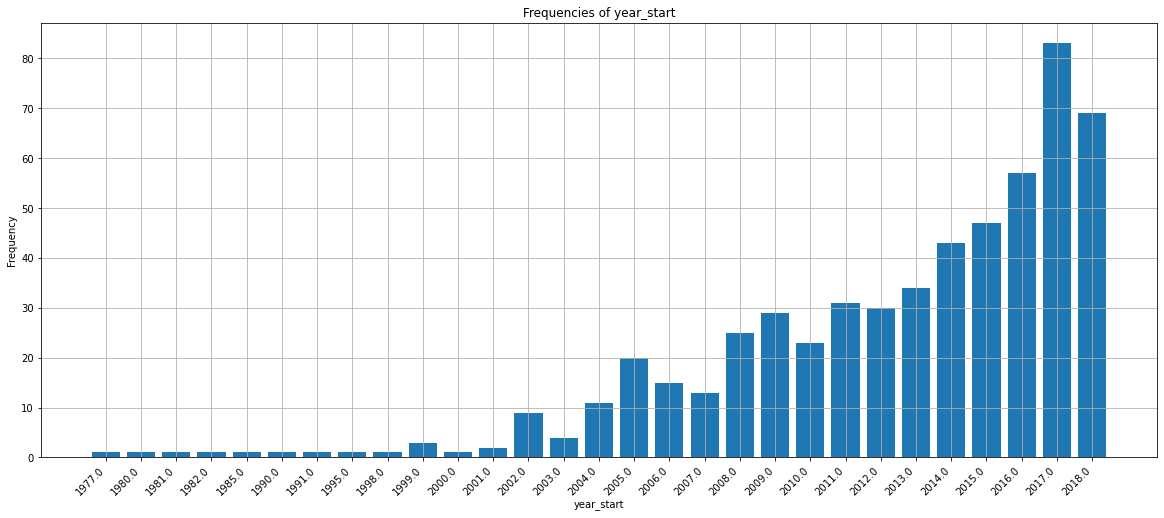

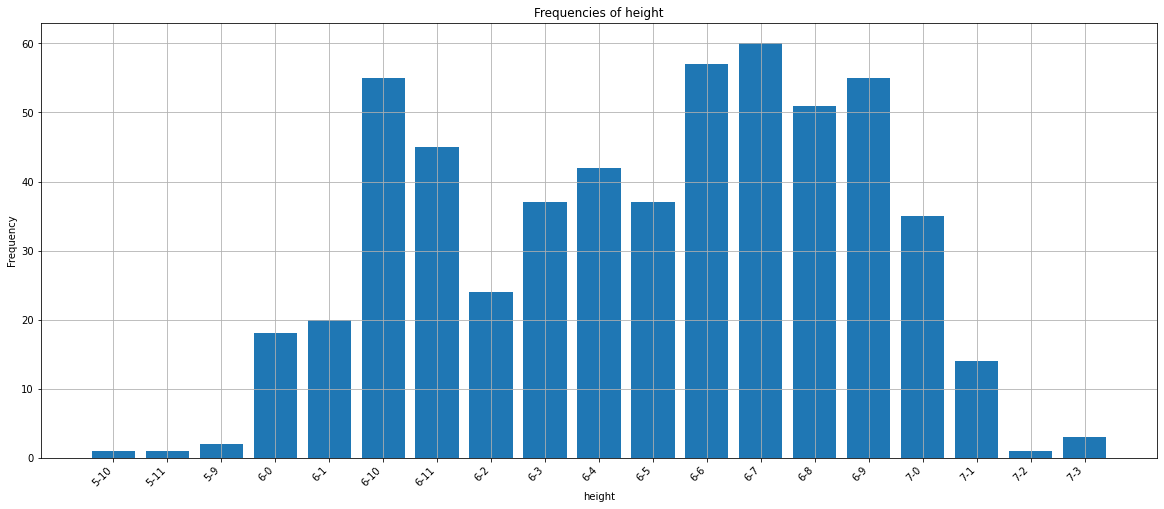

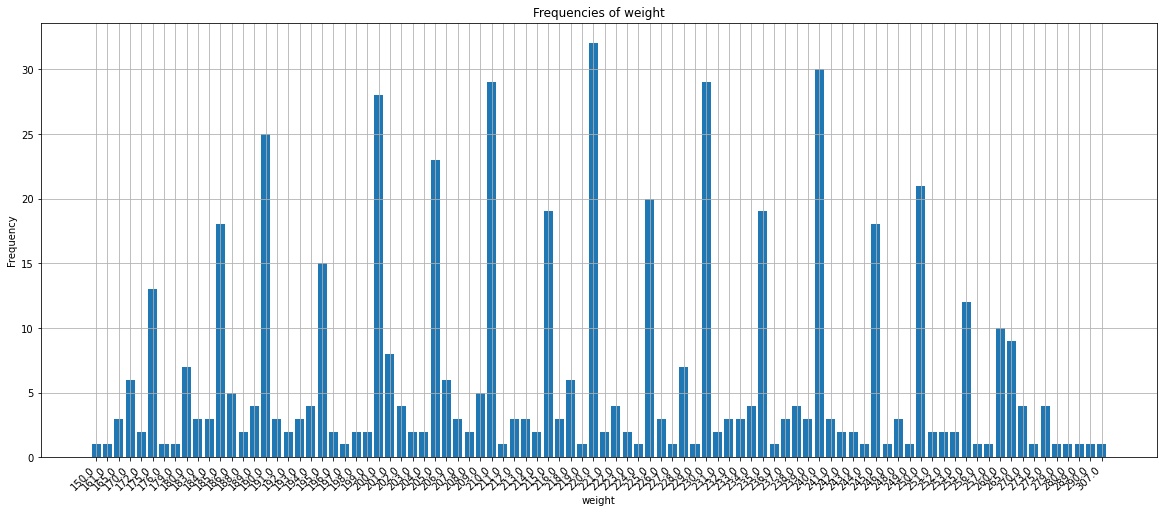

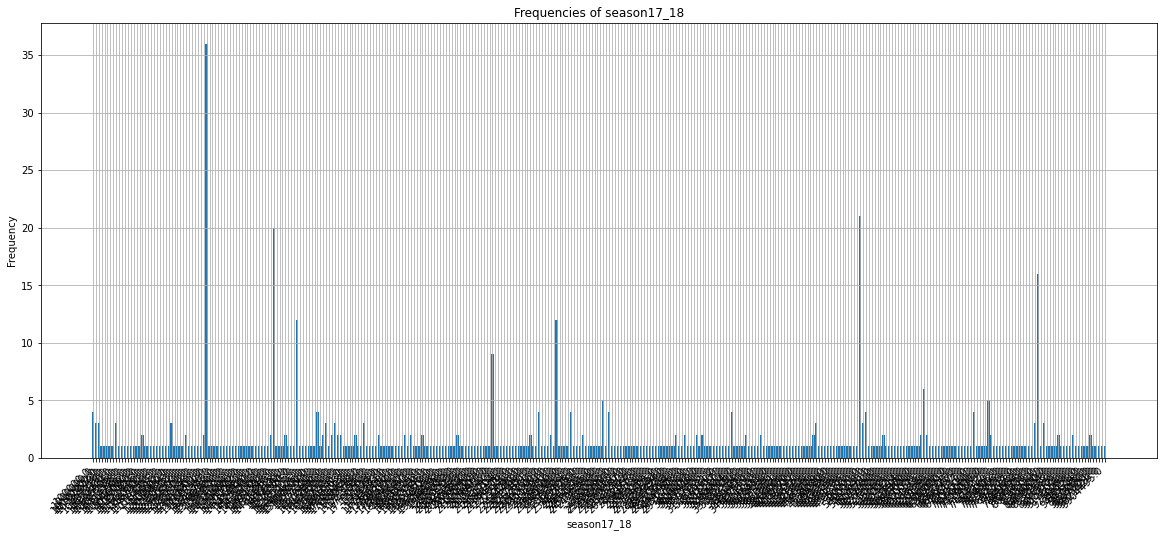

In [2]:
importlib.reload(myutils)

fname = os.path.join("input_data", "joined_data.csv")
table = MyPyTable().load_from_file(fname)

myutils.show_frequencies(table, "year_start")
myutils.show_frequencies(table, "height")
myutils.show_frequencies(table, "weight")
myutils.show_frequencies(table, "season17_18")

### Classification Results

To reiterate, we used Random Forest classification, Decision Tree classification, and ZeroR classification with random subsampling. 
Random Forest classification was the most accurate, followed closely by ZeroR, and then Decision Tree classification.

We began tuning Random Forest classification with N = 20, M = 7, and F = 2 out of 4. This yielded an accuracy of 44%.
With N = 80, M = 7, and F = 3, we got an accuracy of 47%. This was the highest accuracy we could come up with, unfortunately. 
That caused us to go with the Random Forest classification.

With a start year of 2010, a height of 6-1, a weight class of 3, and a position of Forward - Guard, we predict the highest salary class<br>
https://nba-statistics-app-igioffre.herokuapp.com/predict?year_start=2010&height=6-1&weight_class=3&position=F-G - Salary Class 5<br>
With a start year of 2017, a height of 6-10, a weight class of 4, and a position of Center, we predict the middle salary class<br>
https://nba-statistics-app-igioffre.herokuapp.com/predict?year_start=2017&height=6-10&weight_class=4&position=C - Salary Class 3


### Conclusion

To conclude, we used a combined dataset of NBA players' start year, height, discretized weight, and position to predict a discretized salary
via the Random Forest classification method.

One of the challenges we faced in this project was which attributes to trim when predicting salaries. We ended up chosing the four we did, but our 
accuracy was less than 50%, which is not ideal. We also could have discretized height to simplify the input and perhaps improve accuracy. In a similar vein, 
we could have increased the number of salary classes. This likely would have raised our precision, but decreased the accuracy. 
And of course, we only looked at the 2017 to 2018 season's salary data, so we have very limited data. Nonetheless, given the datasets we used, we attempted to
balance accuracy and precision.